In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
loan = pd.read_csv("dataset/loan_train.csv", sep=";")

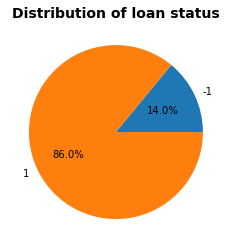

In [3]:
perc_status_neg = len(loan.loc[loan["status"] == -1]) / len(loan) * 100
perc_status_pos = len(loan.loc[loan["status"] == 1]) / len(loan) * 100
plt.title("Distribution of loan status", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.pie([perc_status_neg, perc_status_pos], labels=["-1", "1"], autopct='%.1f%%')
plt.savefig("new_stats/loan_status_dist.png")

/home/mechjm/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


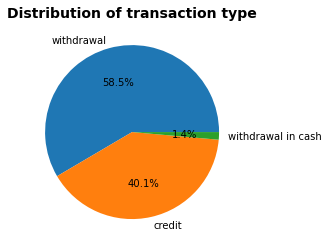

In [4]:
trans_train = pd.read_csv("dataset/trans_train.csv", sep=";")
trans_test = pd.read_csv("dataset/trans_test.csv", sep=";")
trans = trans_train.append(trans_test)
total = len(trans)
percs = np.array([trans["type"].value_counts().values / total] * 100)[0]
plt.title("Distribution of transaction type", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.pie(percs, labels=trans["type"].value_counts().keys(), autopct='%.1f%%')
plt.savefig("new_stats/trans_type_dist.png")

<ipython-input-11-8c6175715e64>:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(percs, labels=trans["operation"].value_counts().keys(), autopct='%.1f%%')


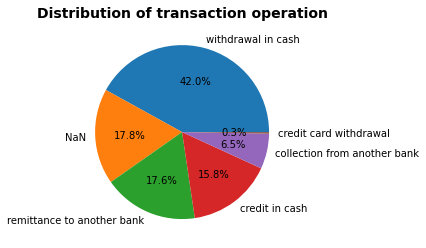

In [11]:
count_miss = 0
#for index, row in trans.iterrows():
#   if pd.isnull(row["operation"]):
 #      row["operation"] = "NaN"
        
trans.fillna("NaN", inplace=True)
        
#print(count_miss)

percs = np.array([trans["operation"].value_counts().values / total] * 100)[0]
plt.title("Distribution of transaction operation", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.pie(percs, labels=trans["operation"].value_counts().keys(), autopct='%.1f%%')
plt.savefig("new_stats/trans_operation_dist.png")

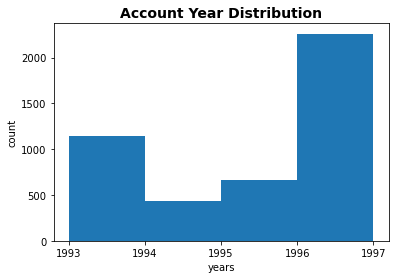

In [73]:
account = pd.read_csv("dataset/account.csv", sep=";")
card_train = pd.read_csv("dataset/card_train.csv", sep=";")
client = pd.read_csv("dataset/client.csv", sep=";")
disp = pd.read_csv("dataset/disp.csv", sep=";")
district = pd.read_csv("dataset/district.csv", sep=";")
loan_train = pd.read_csv("dataset/loan_train.csv", sep=";")

years = [int("19" + str(row["date"])[:2]) for _,row in account.iterrows()]
plt.hist(years, bins=[1993,1994,1995,1996,1997])
#axs = sb.histplot(years,bins=[1993,1994,1995,1996,1997])
#axs.set_xlabel(10)
plt.xticks(ticks=[1993,1994,1995,1996,1997])
plt.title("Account Year Distribution", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel("count")
plt.xlabel("years")
plt.savefig("new_stats/account_year_dist.png")



In [ ]:
district.rename(columns={"code ": "district_id"}, inplace=True)

client_disp = client.merge(disp, on="client_id")
client_disp_card = client_disp.merge(card_train, on="disp_id", how="left")
client_disp_card_dist = client_disp_card.merge(district, on="district_id")
client_disp_card_dist_account = client_disp_card_dist.merge(account, on="account_id")
client_disp_card_dist_account_loan = client_disp_card_dist_account.merge(loan, on="account_id", how="left")
final = client_disp_card_dist_account_loan.merge(trans_train, on="account_id")

In [1]:
#final.fillna("")
plt.figure(figsize = (25,15))
plt.title("Correlation Matrix Heatmap", fontdict={'fontsize': 14, 'fontweight': 'bold'})
sb.heatmap(final.corr().abs(),annot=True)
plt.savefig("new_stats/correlation.png")

NameError: name 'plt' is not defined

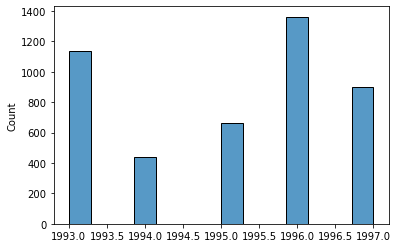